In [1]:
# importing the basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import warnings
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.width",1000)

In [ ]:
# selectively advanced libraries 
"""
sklearn statsmodels scipy 
"""
# analyis that will be performed next 

"""
Hierarchial clutering 
PCA after visualizing the data 
"""
from sklearn.preprocessing import StandardScaler , minmax_scale
from datetime import datetime
from sklearn.cluster import AgglomerativeClustering


In [5]:
og_df = pd.read_excel("Merged_UAE_ML.xlsx",sheet_name='Processed')

og_df.head()

,Organization Name,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding Amount (in USD),Top 5 Investors,Estimated Revenue Range,Number of Articles
0,Kofah,2024-10-10,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,Khaled Jo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BuenAura,2024-10-07,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UX Arabic Magazine,2024-09-29,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Majesty Experiences,2024-09-03,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,coins.com,2024-09-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,NaN,NaT,Adam Perzow,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Reomving unnecessary columns
"""
Headquarters Location
"""

# Preprocessing 
"""
Founders -> NO of Founders
Top 5 Investors -> No of Investors 
Last Funding Status -> convert into categorical columns # Label Encoding  
Operative Status -> One Hot encoding 
Total Funding Amount -> Standard Scaling or min max scaling 
Converting Estimated Revenue range -> by mapping 
Converting the Number of Employees -> into numerical numbers 

"""

# handling Missing values and Outliers 
# replacing the missing values with 0
# outliers are in the total funding amount 

# choose between Standard Scaler or MinMax Scaler -- Normalization 


# GIVE the 1300 data points and tell them to predict the target variables
"""
mention them about the filtering based on industries like choose between particular industries only to rank them based on scorecard.
"""



In [ ]:
# Filter based on industries


In [57]:
df = og_df.copy()

In [58]:
def count_name(col):
    return col.apply(lambda x : len(x.split(',')) if isinstance(x,str) and x.strip() else 0)


def scaling():
    pass

In [59]:
df['Founders']

0           Khaled Jo
1                 NaN
2                 NaN
3                 NaN
4         Adam Perzow
             ...     
12995             NaN
12996             NaN
12997             NaN
12998    Tommy Wilken
12999             NaN
Name: Founders, Length: 13000, dtype: object

In [60]:
df['Founders'] = count_name(df['Founders'])
df = df.rename(columns={'Founders':'No of Founders',
               'Total Funding Amount (in USD)': 'Total Funding'})



In [61]:
numerical_col = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
date_col = df.select_dtypes(include='datetime64').columns.tolist()

In [15]:
df['No of Founders'].describe().T

count    13000.000000
mean         0.476846
std          0.784349
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: No of Founders, dtype: float64

In [62]:
df_reset = df.reset_index()

## Countplot

<Axes: xlabel='No of Founders', ylabel='count'>

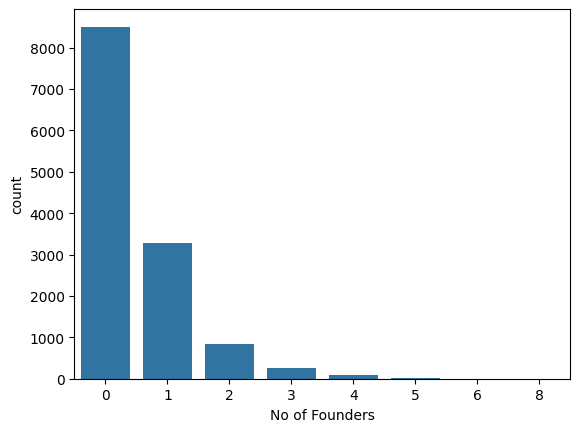

In [68]:
sns.countplot(x=df['No of Founders'],data=df_reset)

<Axes: xlabel='No of Founders', ylabel='Count'>

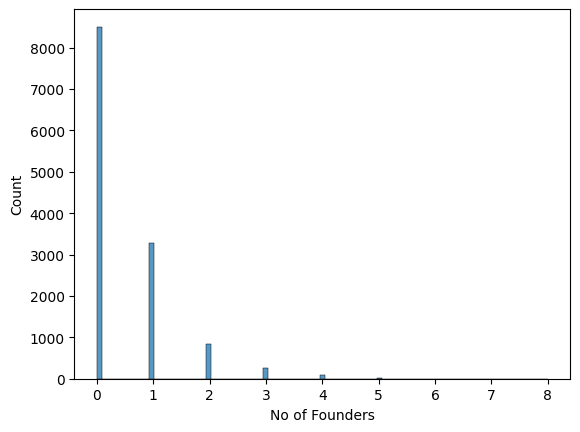

In [24]:
sns.histplot(df['No of Founders'])

In [22]:
df.isna().sum()

Organization Name                   0
Founded Date                        0
Operating Status                    0
Headquarters Location               0
Number of Employees               523
Last Funding Amount (in USD)    11834
Last Funding Date               11225
No of Founders                      0
Number of Funding Rounds        11225
Funding Status                  11424
Last Funding Type               11225
Total Funding                   11654
Top 5 Investors                 11740
Estimated Revenue Range          7172
Number of Articles              10881
dtype: int64

In [72]:
df = df[df['Total Funding'].notna()]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Organization Name             1346 non-null   object        
 1   Founded Date                  1346 non-null   datetime64[ns]
 2   Operating Status              1346 non-null   object        
 3   Headquarters Location         1346 non-null   object        
 4   Number of Employees           1312 non-null   object        
 5   Last Funding Amount (in USD)  1166 non-null   float64       
 6   Last Funding Date             1346 non-null   datetime64[ns]
 7   No of Founders                1346 non-null   int64         
 8   Number of Funding Rounds      1346 non-null   float64       
 9   Funding Status                1147 non-null   object        
 10  Last Funding Type             1346 non-null   object        
 11  Total Funding                 134

In [103]:
df_processed = df.copy()


In [104]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Organization Name             1346 non-null   object        
 1   Founded Date                  1346 non-null   datetime64[ns]
 2   Operating Status              1346 non-null   object        
 3   Headquarters Location         1346 non-null   object        
 4   Number of Employees           1312 non-null   object        
 5   Last Funding Amount (in USD)  1166 non-null   float64       
 6   Last Funding Date             1346 non-null   datetime64[ns]
 7   No of Founders                1346 non-null   int64         
 8   Number of Funding Rounds      1346 non-null   float64       
 9   Funding Status                1147 non-null   object        
 10  Last Funding Type             1346 non-null   object        
 11  Total Funding                 134

In [77]:
df_processed['Operating Status']

21       Active
42       Active
51       Active
57       Active
58       Active
          ...  
12841    Active
12842    Active
12843    Active
12906    Active
12926    Active
Name: Operating Status, Length: 1346, dtype: object

In [23]:
# df_encoded = pd.get_dummies(df,columns=['Operating Status'])

In [105]:
df_processed = df_processed.drop(['Organization Name'],axis=1)

In [78]:
processed_num_col = df_processed.select_dtypes(include=['number']).columns.tolist()
processed_cat_col = df_processed.select_dtypes(include=['int','float']).columns.tolist()
processed_date_col = df_processed.select_dtypes(include=['datetime64']).columns.tolist()

In [28]:
def subplot_grid(num_plots, max_cols=3):

    ncols = min(max_cols, num_plots)
    nrows = (num_plots + ncols - 1) // ncols
    return nrows, ncols

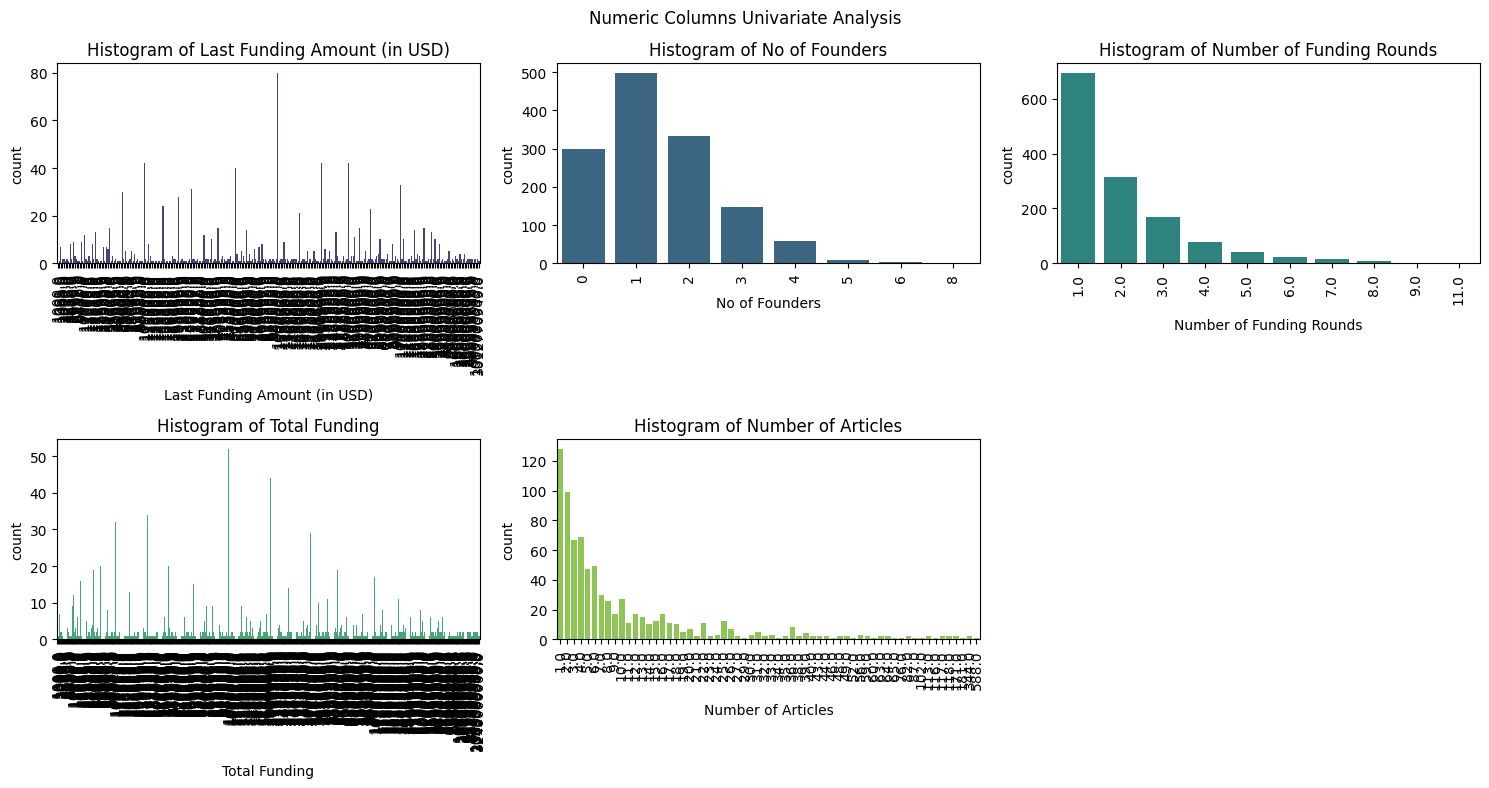

In [87]:
num_plots = len(processed_cat_col)
nrows, ncols = subplot_grid(num_plots)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))

fig.suptitle('Numeric Columns Univariate Analysis')
axes = axes.flatten()

palette = sns.color_palette('viridis', num_plots)

for i, col in enumerate(numerical_col):
    sns.countplot(x=df_processed[col],data=df_reset, color=palette[i], ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x',rotation=90)
    axes[i].set_xlabel(col, labelpad=10) 



for j in range(num_plots, nrows * ncols):

    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [85]:
df['Number of Articles'].describe().T

count    785.000000
mean      12.913376
std       32.684291
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      588.000000
Name: Number of Articles, dtype: float64

## Using Robust Scaler to standardize Total Funding Amount 

- Since there were outliers I used Robust Scaler to scale the data as it is based on IQR

In [88]:
from sklearn.preprocessing import RobustScaler

In [106]:
trans = RobustScaler()

df_processed['Total Funding Encoded'] = trans.fit_transform(df_processed[['Total Funding']]) 

In [107]:
df_processed['Total Funding Encoded'].describe().T

count    1346.000000
mean        5.880452
std        39.709794
min        -0.263516
25%        -0.208791
50%         0.000000
75%         0.791209
max       711.824176
Name: Total Funding Encoded, dtype: float64

## Encoded categorical data
- Operating Status - One hot encoding
- Last Funded Type - LabelEncoding

In [108]:
df_processed['Operating Status'] = pd.get_dummies(df_processed['Operating Status'],drop_first=True)

In [99]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()

df_processed['Last Funding Type Encoded'] = le.fit_transform(df_processed['Last Funding Type'])


In [112]:
pd.set_option('display.max_rows',500)

In [113]:
df_processed[['Last Funding Type','Last Funding Type Encoded']]

,Last Funding Type,Last Funding Type Encoded
21,Pre-Seed,10
42,Pre-Seed,10
51,Pre-Seed,10
57,Pre-Seed,10
58,Corporate Round,2
...,...,...
12841,Series A,15
12842,Seed,14
12843,Venture - Series Unknown,20
12906,Series A,15


In [115]:
from sklearn.preprocessing import MinMaxScaler

## Scaled Number of Articles

In [116]:
min_max = MinMaxScaler()

In [118]:
df_processed['Number of Articles Encoded'] = min_max.fit_transform(df[['Number of Articles']])

## Encoded Number of Employees with 1,2,3 ...

In [119]:
df_processed['Number of Employees'].unique() 

array(['1-10', nan, '11-50', '51-100', '101-250', '1001-5000', '501-1000',
       '251-500', '5001-10000', '10001+'], dtype=object)

In [120]:
emp_map = {
    '1-10': 1,
    '11-50': 2,
    '51-100' : 3,
    '101-250' : 4,
    '251-500' : 5,
    '501-1000' : 6,
    '1001-5000': 7,
    '5001-10000' : 8,
    '10001+' : 9
}

In [121]:
df_processed['Number of Employees Encoded'] = df_processed['Number of Employees'].map(emp_map)

In [122]:
df_processed['Number of Employees Encoded']

21       1.0
42       1.0
51       1.0
57       1.0
58       NaN
        ... 
12841    2.0
12842    3.0
12843    2.0
12906    4.0
12926    6.0
Name: Number of Employees Encoded, Length: 1346, dtype: float64

In [ ]:
df_processed['NUm']

In [123]:
df_filtered = df_processed[df_processed['Total Funding'].notna()]

In [125]:
df_filtered['Top 5 Investors Encoded'] = count_name(df['Top 5 Investors'])

In [128]:
from datetime import datetime

In [129]:
curr_date = pd.Timestamp(datetime.now())

df_filtered['Funding_Gap'] = (df_filtered['Last Funding Date'] - df_filtered['Founded Date']).dt.days // 365

df_filtered['Time_since_last_fund'] = (curr_date - df_filtered['Last Funding Date']).dt.days // 365

df_filtered['Company_Age'] = (curr_date - df_filtered['Founded Date']).dt.days //365

In [126]:
df_filtered.head()

,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,No of Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding,Top 5 Investors,Estimated Revenue Range,Number of Articles,Total Funding Encoded,Last Funding Type Encoded,Number of Articles Encoded,Number of Employees Encoded,Top 5 Investors Encoded
21,2024-05-10,False,"Dubai, Dubai, United Arab Emirates",1-10,50000.0,2024-01-01,1,1.0,Seed,Pre-Seed,50000.0,NaN,NaN,NaN,-0.252747,10,NaN,1.0,0
42,2024-01-30,False,"Dubai, Dubai, United Arab Emirates",1-10,1000000.0,2024-05-01,1,1.0,Seed,Pre-Seed,1000000.0,NaN,NaN,NaN,-0.043956,10,NaN,1.0,0
51,2024-01-09,False,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1-10,180000.0,2024-01-09,1,1.0,Seed,Pre-Seed,180000.0,"Antler, Adaverse",NaN,NaN,-0.224176,10,NaN,1.0,2
57,2024-01-01,False,"Abu Dhabi, Abu Dhabi, United Arab Emirates",1-10,2250000.0,2024-10-10,2,1.0,Seed,Pre-Seed,2250000.0,"500 Global, Quona Capital, Sukna Ventures, Plu...",NaN,NaN,0.230769,10,NaN,1.0,5
58,2024-01-01,False,"Abu Dhabi, Abu Dhabi, United Arab Emirates",NaN,100000000.0,2024-08-26,0,1.0,NaN,Corporate Round,100000000.0,"Loft Orbital, Marlan Space",NaN,NaN,21.714286,2,NaN,NaN,2


In [130]:
df_filtered = df_filtered.drop(columns=['Number of Employees','Headquarters Location',
                                        'Funding Status','Last Funding Type','Top 5 Investors',
                                        'Founded Date','Last Funding Date'],axis=1)

In [132]:
df_filtered = df_filtered.drop('Estimated Revenue Range',axis=1)

## Selecting df_filtered 
as my Final dataset for hierarchical clutering

In [133]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Operating Status              1346 non-null   bool   
 1   Last Funding Amount (in USD)  1166 non-null   float64
 2   No of Founders                1346 non-null   int64  
 3   Number of Funding Rounds      1346 non-null   float64
 4   Total Funding                 1346 non-null   float64
 5   Number of Articles            785 non-null    float64
 6   Total Funding Encoded         1346 non-null   float64
 7   Last Funding Type Encoded     1346 non-null   int64  
 8   Number of Articles Encoded    785 non-null    float64
 9   Number of Employees Encoded   1312 non-null   float64
 10  Top 5 Investors Encoded       1346 non-null   int64  
 11  Funding_Gap                   1346 non-null   int64  
 12  Time_since_last_fund          1346 non-null   int64  
 13  Compan

### Preprocessing done 
## Starting the Hierarchical clustering

In [134]:
import gower
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch


In [139]:
df_filtered.isna().sum()

Operating Status                  0
Last Funding Amount (in USD)    180
No of Founders                    0
Number of Funding Rounds          0
Total Funding                     0
Number of Articles              561
Total Funding Encoded             0
Last Funding Type Encoded         0
Number of Articles Encoded      561
Number of Employees Encoded      34
Top 5 Investors Encoded           0
Funding_Gap                       0
Time_since_last_fund              0
Company_Age                       0
dtype: int64

In [141]:
df_filtered['Last Funding Amount Scaled'] = trans.fit_transform(df_filtered[['Last Funding Amount (in USD)']])

# df_filtered['Last Funding Amount Scaled'] = trans.fit_transform(df_filtered['Last Funding Amount (in USD)'])



In [142]:
df_filtered = df_filtered.drop('Last Funding Amount (in USD)',axis=1)

In [ ]:
df_filtered = df_filtered.drop(['Number of Articles','Total Funding'],axis=1)

In [143]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Operating Status             1346 non-null   bool   
 1   No of Founders               1346 non-null   int64  
 2   Number of Funding Rounds     1346 non-null   float64
 3   Total Funding                1346 non-null   float64
 4   Number of Articles           785 non-null    float64
 5   Total Funding Encoded        1346 non-null   float64
 6   Last Funding Type Encoded    1346 non-null   int64  
 7   Number of Articles Encoded   785 non-null    float64
 8   Number of Employees Encoded  1312 non-null   float64
 9   Top 5 Investors Encoded      1346 non-null   int64  
 10  Funding_Gap                  1346 non-null   int64  
 11  Time_since_last_fund         1346 non-null   int64  
 12  Company_Age                  1346 non-null   int64  
 13  Last Funding Amount S

In [145]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Operating Status             1346 non-null   bool   
 1   No of Founders               1346 non-null   int64  
 2   Number of Funding Rounds     1346 non-null   float64
 3   Total Funding                1346 non-null   float64
 4   Number of Articles           785 non-null    float64
 5   Total Funding Encoded        1346 non-null   float64
 6   Last Funding Type Encoded    1346 non-null   int64  
 7   Number of Articles Encoded   1346 non-null   float64
 8   Number of Employees Encoded  1346 non-null   float64
 9   Top 5 Investors Encoded      1346 non-null   int64  
 10  Funding_Gap                  1346 non-null   int64  
 11  Time_since_last_fund         1346 non-null   int64  
 12  Company_Age                  1346 non-null   int64  
 13  Last Funding Amount S

In [146]:
df_filtered['Number of Articles Encoded'] = df_filtered['Number of Articles Encoded'].fillna(0)
df_filtered['Number of Employees Encoded'] = df_filtered['Number of Employees Encoded'].fillna(0)

df_filtered['Last Funding Amount Scaled'] = df_filtered['Last Funding Amount Scaled'].fillna(3)



In [148]:
df_filtered = df_filtered.drop('Number of Articles',axis=1)

In [149]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 21 to 12926
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Operating Status             1346 non-null   bool   
 1   No of Founders               1346 non-null   int64  
 2   Number of Funding Rounds     1346 non-null   float64
 3   Total Funding                1346 non-null   float64
 4   Total Funding Encoded        1346 non-null   float64
 5   Last Funding Type Encoded    1346 non-null   int64  
 6   Number of Articles Encoded   1346 non-null   float64
 7   Number of Employees Encoded  1346 non-null   float64
 8   Top 5 Investors Encoded      1346 non-null   int64  
 9   Funding_Gap                  1346 non-null   int64  
 10  Time_since_last_fund         1346 non-null   int64  
 11  Company_Age                  1346 non-null   int64  
 12  Last Funding Amount Scaled   1346 non-null   float64
dtypes: bool(1), float64(6

In [154]:
gower_dist = gower.gower_matrix(df_filtered)

In [155]:
gower_dist

array([[0.        , 0.00302794, 0.0286091 , ..., 0.25976494, 0.26402164,
        0.3454471 ],
       [0.00302794, 0.        , 0.0257009 , ..., 0.256737  , 0.2609937 ,
        0.34241915],
       [0.0286091 , 0.0257009 , 0.        , ..., 0.23115586, 0.23541254,
        0.316838  ],
       ...,
       [0.25976494, 0.256737  , 0.23115586, ..., 0.        , 0.15055774,
        0.1478123 ],
       [0.26402164, 0.2609937 , 0.23541254, ..., 0.15055774, 0.        ,
        0.10340347],
       [0.3454471 , 0.34241915, 0.316838  , ..., 0.1478123 , 0.10340347,
        0.        ]], dtype=float32)

/home/thunderrr/anaconda3/envs/offical_repo/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Silhouette Score (Gower Distance): 0.412


/tmp/ipykernel_582/1270763090.py:10: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  sch.dendrogram(sch.linkage(gower_dist, method='complete'))


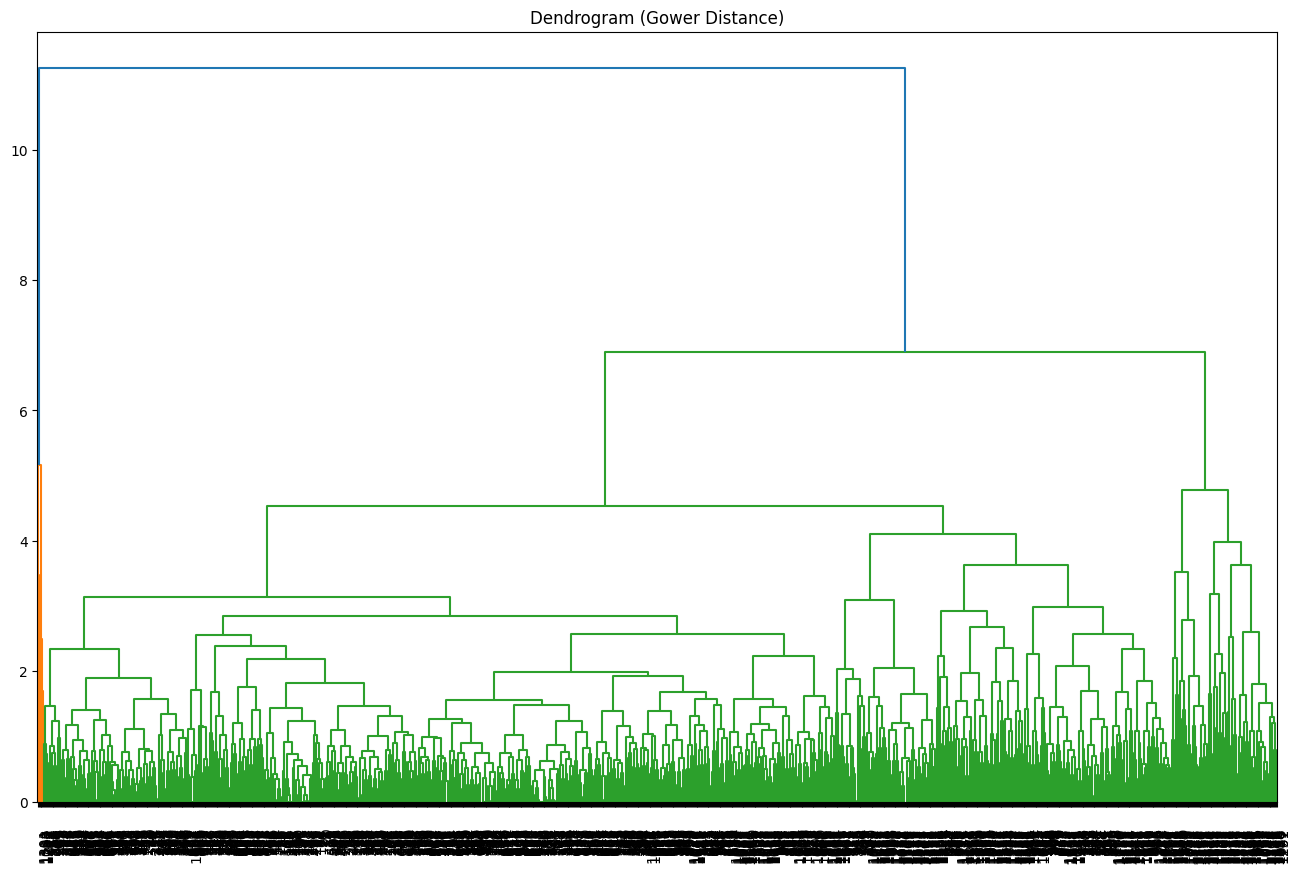

In [166]:
# Step 2: Perform Agglomerative Clustering with Gower distance
hc_gower = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_gower = hc_gower.fit_predict(gower_dist)

silhouette_avg_gower = silhouette_score(gower_dist, labels_gower, metric='precomputed')
print(f'Silhouette Score (Gower Distance): {silhouette_avg_gower:.3f}')

# Optional: Plot Dendrogram for Gower Distance
plt.figure(figsize=(16,10))
sch.dendrogram(sch.linkage(gower_dist, method='complete'))
plt.title("Dendrogram (Gower Distance)")
plt.xticks(rotation=90, ha='center', fontsize=10)  # 'ha' is horizontal alignment
plt.setp(plt.gca().get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')
# plt.tick_params('x',rotation=90)
plt.tick_params(axis='x', which='both', bottom=True, top=False,labelsize=10, pad=15)
plt.show()

In [168]:
gower_df = pd.DataFrame(gower_dist)

In [169]:
gower_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345
0,0.000000,0.003028,0.028609,0.076837,0.084829,0.113388,0.002991,0.110970,0.098972,0.091427,0.026083,0.012605,0.067315,0.021156,0.002967,0.028554,0.026923,0.008464,0.057815,0.125605,0.023570,0.095323,0.019547,0.039523,0.040508,0.105896,0.027684,0.057864,0.030274,0.018371,0.096602,0.053895,0.049974,0.159055,0.097001,0.054858,0.060700,0.024484,0.051837,0.040259,0.023568,0.181430,0.108291,0.116681,0.109043,0.063910,0.099953,0.058214,0.067418,0.048714,0.053533,0.068298,0.104235,0.066626,0.084468,0.078144,0.032157,0.037195,0.023580,0.065774,0.035384,0.111813,0.043078,0.061204,0.039448,0.011415,0.031293,0.090874,0.021283,0.022495,0.047888,0.051768,0.065742,0.035348,0.109749,0.046000,0.028223,0.062175,0.052413,0.049785,0.097343,0.027990,0.034553,0.029716,0.033487,0.111366,0.037608,0.037607,0.063537,0.039098,0.060423,0.045087,0.034567,0.055091,0.062826,0.016939,0.067800,0.045754,0.083796,0.037772,0.094514,0.028557,0.037067,0.044840,0.047378,0.053839,0.044416,0.070248,0.034607,0.034267,0.063425,0.073046,0.029127,0.067888,0.022401,0.046388,0.024940,0.161863,0.084882,0.032957,0.034585,0.057380,0.033486,0.084249,0.058776,0.031601,0.040325,0.120330,0.038172,0.107982,0.037619,0.056054,0.050620,0.164626,0.048927,0.110415,0.165705,0.045166,0.147123,0.079909,0.118661,0.132953,0.086465,0.028554,0.099888,0.077068,0.105684,0.142489,0.123983,0.040486,0.138216,0.086477,0.130776,0.036233,0.038228,0.108533,0.067146,0.044566,0.066125,0.052541,0.105400,0.041215,0.056494,0.099263,0.117665,0.066171,0.076513,0.114356,0.040596,0.115007,0.071348,0.084368,0.154688,0.040676,0.046343,0.091209,0.065367,0.062759,0.058736,0.048937,0.062072,0.033757,0.076250,0.034571,0.085888,0.024948,0.034563,0.019868,0.093601,0.024938,0.066846,0.137759,0.048289,0.058330,0.078201,0.063401,0.041635,0.164626,0.048927,0.110415,0.165705,0.045166,0.147123,0.079909,0.118661,0.132953

# how to find most important feature from Gower_list

Silhouette Score: 0.336


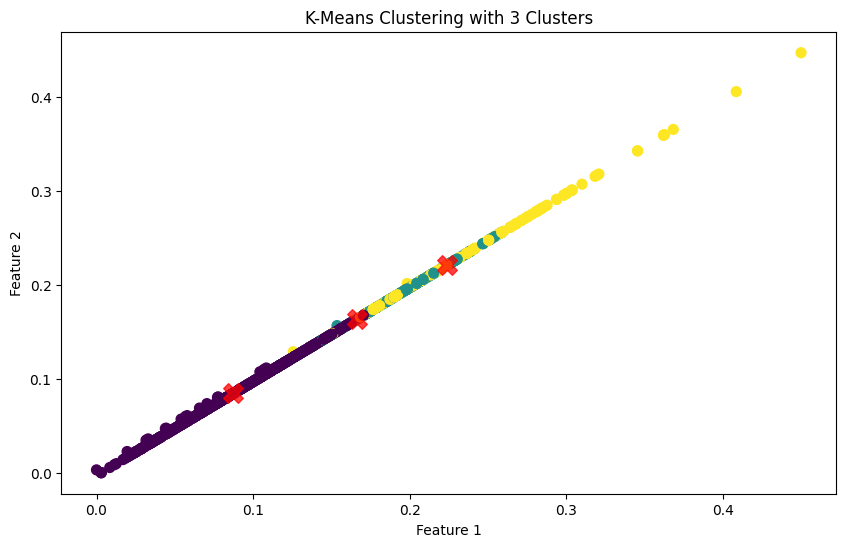

In [170]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming gower_SET is a DataFrame or a 2D array
# Convert your DataFrame to a NumPy array if necessary
# If gower_SET is already a NumPy array, you can skip this step
# gower_array = gower_SET.values  # Uncomment if gower_SET is a DataFrame

# Step 1: Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(gower_df)  # Use your dataset directly

# Step 2: Calculate silhouette score for evaluation (optional)
silhouette_avg = silhouette_score(gower_df, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(gower_df.iloc[:, 0], gower_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')  # Use first two features for visualization
centers = kmeans.cluster_centers_  # Get cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark cluster centers
plt.title("K-Means Clustering with 3 Clusters")
plt.xlabel("Feature 1")  # Adjust labels based on your features
plt.ylabel("Feature 2")  # Adjust labels based on your features
plt.show()

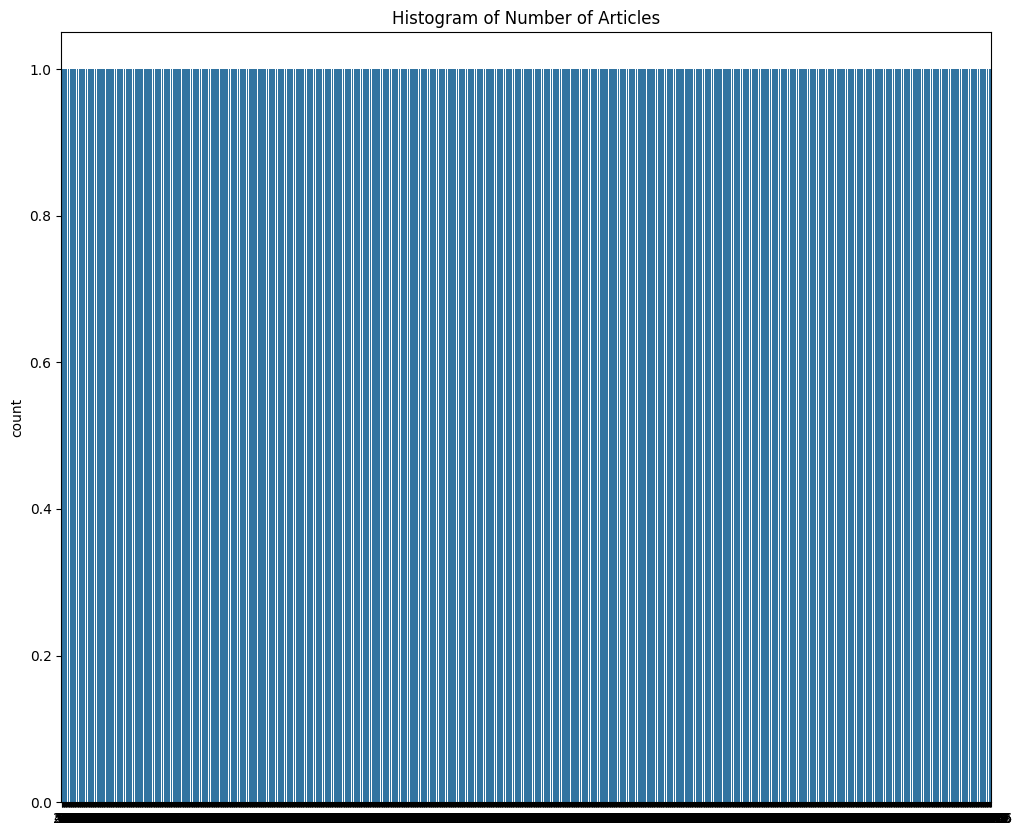

In [84]:
# countplot
plt.figure(figsize=(12,10))
sns.countplot(df_processed['Number of Articles'])
plt.title("Histogram of Number of Articles")
plt.show()

In [38]:
df_selected = df[df['Total funding'].notna()]


<Axes: xlabel='Total Funding', ylabel='Count'>

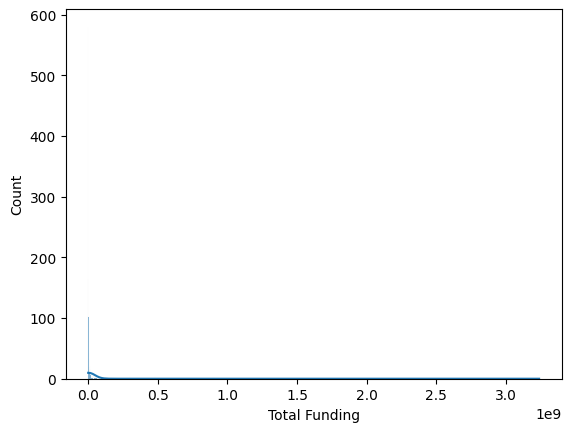

In [67]:
sns.histplot(df['Total Funding'],kde=True)

In [32]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12619 entries, 0 to 12999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Organization Name             12619 non-null  object        
 1   Founded Date                  12619 non-null  datetime64[ns]
 2   Operating Status              12619 non-null  object        
 3   Headquarters Location         12619 non-null  object        
 4   Number of Employees           12131 non-null  object        
 5   Last Funding Amount (in USD)  1083 non-null   float64       
 6   Last Funding Date             1653 non-null   datetime64[ns]
 7   No of Founders                12619 non-null  int64         
 8   Number of Funding Rounds      1653 non-null   float64       
 9   Funding Status                1456 non-null   object        
 10  Last Funding Type             1653 non-null   object        
 11  Total Funding                 125

In [39]:
df_selected = df_selected.reset_index()

In [40]:
df_selected = df_selected.drop(['Organization Name'],axis=1)

In [35]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Founded Date                  13000 non-null  datetime64[ns]
 1   Operating Status              13000 non-null  object        
 2   Headquarters Location         13000 non-null  object        
 3   Number of Employees           12477 non-null  object        
 4   Last Funding Amount (in USD)  1166 non-null   float64       
 5   Last Funding Date             1775 non-null   datetime64[ns]
 6   No of Founders                13000 non-null  int64         
 7   Number of Funding Rounds      1775 non-null   float64       
 8   Funding Status                1576 non-null   object        
 9   Last Funding Type             1775 non-null   object        
 10  Total Funding                 1346 non-null   float64       
 11  Top 5 Investors             

In [41]:
df_selected

,index,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,No of Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding,Top 5 Investors,Estimated Revenue Range,Number of Articles
0,0,2024-10-10,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-10-07,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2024-09-29,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2024-09-03,Active,"Dubai, Dubai, United Arab Emirates",1-10,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,4,2024-09-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12614,12995,2011-01-01,Active,"Sharjah, Sharjah, United Arab Emirates",51-100,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12615,12996,2011-01-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,$1M to $10M,NaN
12616,12997,2011-01-01,Active,"Dubai, Dubai, United Arab Emirates",11-50,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12617,12998,2011-01-01,Active,"Abu Dhabi, Abu Dhabi, United Arab Emirates",11-50,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN,$1M to $10M,NaN


In [52]:
df.columns

Index(['Organization Name', 'Founded Date', 'Operating Status', 'Headquarters Location', 'Number of Employees', 'Last Funding Amount (in USD)', 'Last Funding Date', 'No of Founders', 'Number of Funding Rounds', 'Funding Status', 'Last Funding Type', 'Total Funding', 'Top 5 Investors', 'Estimated Revenue Range', 'Number of Articles'], dtype='object')

In [53]:
df_selected['Funded_or_not'] = df['Total Funding'].apply(lambda x: 'Yes' if isinstance(x,(int,float)) else "No" )

In [45]:
df_selected = df_selected[df_selected['Funded_or_not']=='Yes']

In [51]:
df_selected.groupby('Funded_or_not').count()

,index,Founded Date,Operating Status,Headquarters Location,Number of Employees,Last Funding Amount (in USD),Last Funding Date,No of Founders,Number of Funding Rounds,Funding Status,Last Funding Type,Total Funding,Top 5 Investors,Estimated Revenue Range,Number of Articles
Funded_or_not,,,,,,,,,,,,,,,
Yes,12619,12619,12619,12619,12131,1083,1653,12619,1653,1456,1653,1257,1194,5691,2036


<Axes: ylabel='Funded_or_not'>

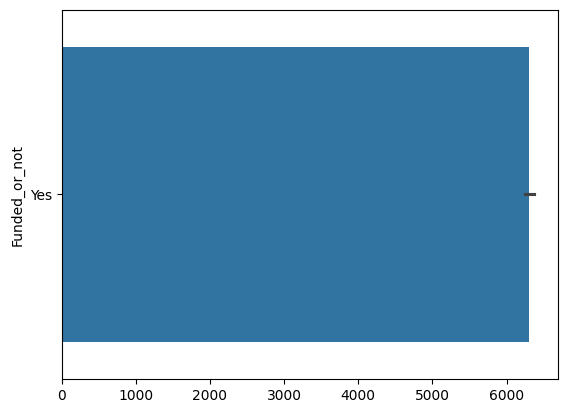

In [54]:
sns.barplot(df_selected['Funded_or_not'])

<Axes: xlabel='count', ylabel='Funded_or_not'>

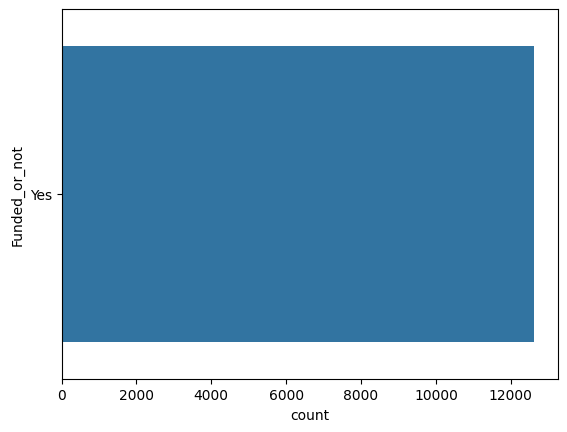

In [47]:
sns.countplot(df_selected['Funded_or_not'])

In [46]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12619 entries, 0 to 12618
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         12619 non-null  int64         
 1   Founded Date                  12619 non-null  datetime64[ns]
 2   Operating Status              12619 non-null  object        
 3   Headquarters Location         12619 non-null  object        
 4   Number of Employees           12131 non-null  object        
 5   Last Funding Amount (in USD)  1083 non-null   float64       
 6   Last Funding Date             1653 non-null   datetime64[ns]
 7   No of Founders                12619 non-null  int64         
 8   Number of Funding Rounds      1653 non-null   float64       
 9   Funding Status                1456 non-null   object        
 10  Last Funding Type             1653 non-null   object        
 11  Total Funding               

<Axes: ylabel='Number of Articles'>

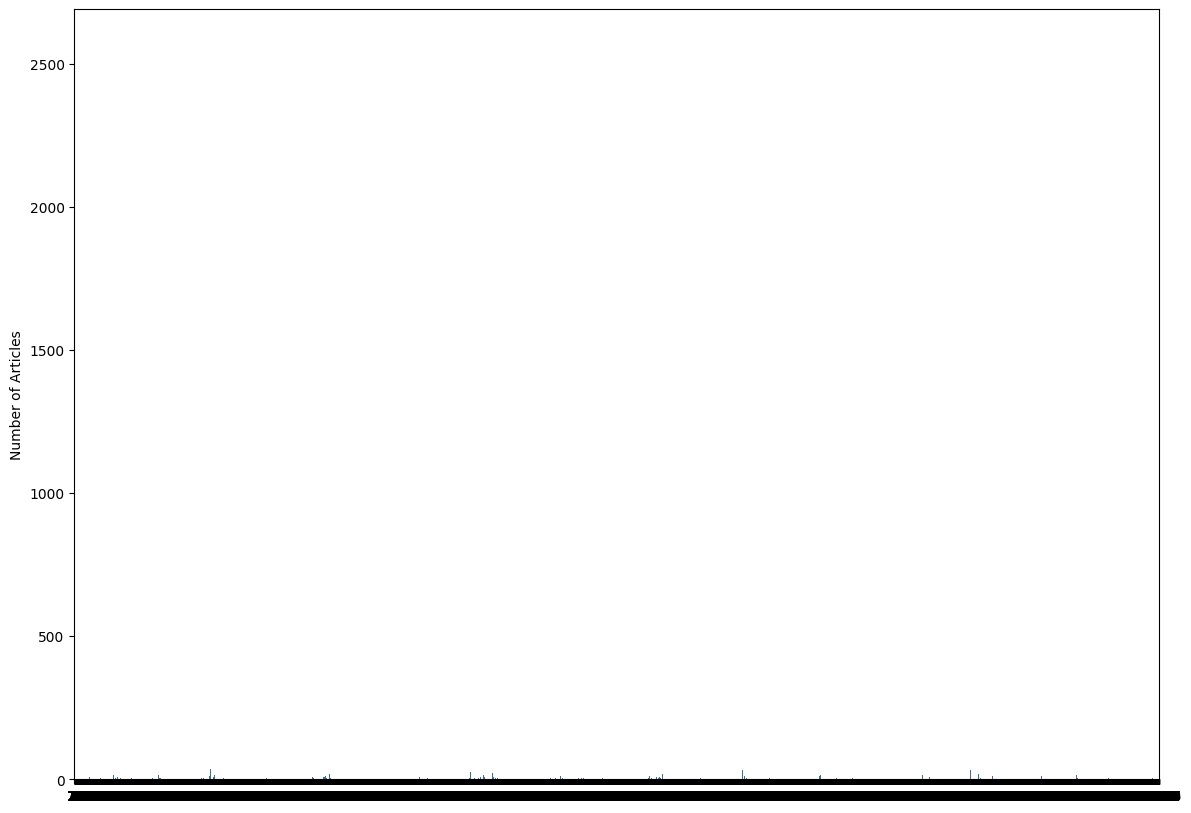

In [56]:
plt.figure(figsize=(14,10))
sns.barplot(df['Number of Articles'])
plt.xticks()

In [ ]:
df['Number of Articles']